In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam as adam
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import RandomOverSampler, SMOTE
from tensorflow.keras.callbacks import EarlyStopping


X_train1 = np.load('/content/Xtrain1.npy')
Y_train1 = np.load('/content/Ytrain1.npy')

X_train1_extra = np.load('/content/Xtrain1_extra.npy')

X_test1 = np.load('/content/Xtest1.npy')

In [5]:
# Normalize the data
X_train1 = X_train1.astype('float32') / 255.0
X_test1 = X_test1.astype('float32') / 255.0
X_train1_extra = X_train1_extra.astype('float32') / 255.0

# Reshape data for CNN
X_train1 = X_train1.reshape(-1, 48, 48, 1)
X_test1 = X_test1.reshape(-1, 48, 48, 1)
X_train1_extra = X_train1_extra.reshape(-1, 48, 48, 1)
X_test1 = X_test1.reshape(-1, 48, 48, 1)

# Train-test split for validation
X_train_train, X_train_test, Y_train_train, Y_train_test = train_test_split(X_train1, Y_train1, test_size=0.2, random_state=42)

# Validation test split for training
X_train_test, X_val, Y_train_test, Y_val = train_test_split(X_train_test, Y_train_test, test_size=0.5, random_state=42)

# Convert labels to categorical (for CNN)
y_train_train_cat = to_categorical(Y_train_train, 2)
y_train_test_cat = to_categorical(Y_train_test, 2)
y_val_cat = to_categorical(Y_val, 2)

# Flatten the data
X_train_train_flat = X_train_train.reshape(-1, 48*48)
X_train_test_flat = X_train_test.reshape(-1, 48*48)


# CNN
## CNN without early stopping


In [ ]:
# This has no early stopping
'''
# Initialize CNN model
model_CNN = Sequential()
model_CNN.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Flatten())
model_CNN.add(Dense(64, activation='relu'))
model_CNN.add(Dense(2, activation='softmax'))

# Compile the model
model_CNN.compile(optimizer=adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
history_cnn = model_CNN.fit(X_train_train, y_train_train_cat, epochs=150, batch_size=50, validation_data=(X_train_test, y_train_test_cat))



# Plot the loss curve
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Predict on validation data
y_pred_cnn = np.argmax(model_CNN.predict(X_train_test), axis=1)

# Evaluate
f1_cnn = f1_score(Y_train_test, y_pred_cnn)
conf_matrix_cnn = confusion_matrix(Y_train_test, y_pred_cnn)

print(f'CNN F1 Score: {f1_cnn}')
print(f'CNN Confusion Matrix:\n {conf_matrix_cnn}')
'''

SyntaxError: incomplete input (<ipython-input-8-8d30fc984a03>, line 2)

## CNN with early stopping


Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.6231 - loss: 0.6427 - val_accuracy: 0.6810 - val_loss: 0.5806
Epoch 2/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7193 - loss: 0.5668 - val_accuracy: 0.7599 - val_loss: 0.5277
Epoch 3/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7925 - loss: 0.4996 - val_accuracy: 0.8244 - val_loss: 0.5174
Epoch 4/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8170 - loss: 0.4467 - val_accuracy: 0.7563 - val_loss: 0.4673
Epoch 5/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8409 - loss: 0.4043 - val_accuracy: 0.8029 - val_loss: 0.4623
Epoch 6/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8373 - loss: 0.3842 - val_accuracy: 0.7742 - val_loss: 0.4578
Epoch 7/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8612 - loss: 0.3333 - val_accuracy: 0.7993 - val_loss: 0.4416
Epoch 8/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8789 - loss: 0.3027 - val_accuracy: 0.8459 - val_loss: 0.4594
Ep

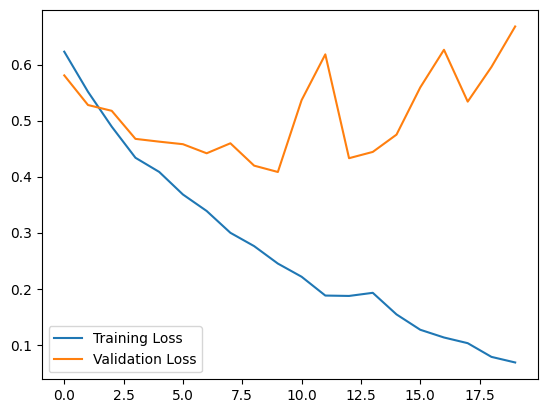

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
CNN F1 Score: 0.9027027027027027
CNN Confusion Matrix:
 [[ 75  10]
 [ 26 167]]
              precision    recall  f1-score   support

   no crater       0.74      0.88      0.81        85
      crater       0.94      0.87      0.90       193

    accuracy                           0.87       278
   macro avg       0.84      0.87      0.85       278
weighted avg       0.88      0.87      0.87       278



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Initialize CNN model
model_CNN = Sequential()
model_CNN.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Flatten())
model_CNN.add(Dense(64, activation='relu'))
model_CNN.add(Dense(2, activation='softmax'))
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',  # Can also use 'val_accuracy'
                               patience=10,         # Number of epochs with no improvement after which training stops
                               mode='min',          # 'min' because we want to minimize the validation loss
                               restore_best_weights=True)  # Restore model weights from the epoch with the best loss

# Compile the model (use binary_crossentropy for binary classification)
model_CNN.compile(optimizer=adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history_cnn = model_CNN.fit(X_train_train, y_train_train_cat,
                            epochs=40,
                            batch_size=50,
                            validation_data=(X_val, y_val_cat),
                            callbacks=[early_stopping])  # Add the early stopping callback


# Plot the training and validation loss
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Predict on validation data and evaluate
y_pred_cnn = np.argmax(model_CNN.predict(X_train_test), axis=1)

# Evaluate
f1_cnn = f1_score(Y_train_test, y_pred_cnn) # Add macro
conf_matrix_cnn = confusion_matrix(Y_train_test, y_pred_cnn)

print(f'CNN F1 Score: {f1_cnn}')
print(f'CNN Confusion Matrix:\n {conf_matrix_cnn}')


print(classification_report(Y_train_test,y_pred_cnn,target_names= ['no crater','crater'] ))

# Double CNN hidden nodes

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.6083 - loss: 0.6491 - val_accuracy: 0.7168 - val_loss: 0.5812
Epoch 2/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7210 - loss: 0.5577 - val_accuracy: 0.7204 - val_loss: 0.5339
Epoch 3/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7997 - loss: 0.4711 - val_accuracy: 0.8244 - val_loss: 0.4920
Epoch 4/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8342 - loss: 0.4409 - val_accuracy: 0.7670 - val_loss: 0.4590
Epoch 5/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8484 - loss: 0.3724 - val_accuracy: 0.7706 - val_loss: 0.4417
Epoch 6/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8661 - loss: 0.3242 - val_accuracy: 0.7814 - val_loss: 0.4702
Epoch 7/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8625 - loss: 0.3105 - val_accuracy: 0.8172 - val_loss: 0.5811
Epoch 8/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8998 - loss: 0.2567 - val_accuracy: 0.8280 - val_loss: 0.4211
Ep

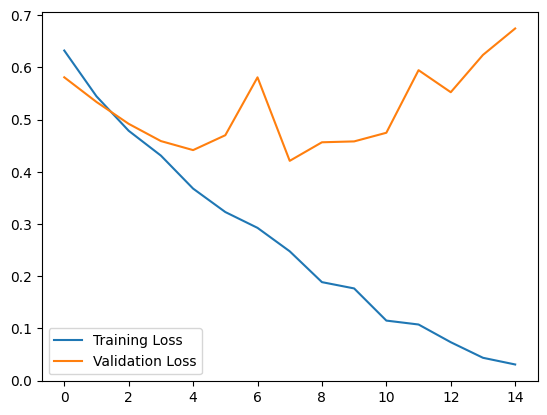

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
CNN double F1 Score: 0.9186351706036745
CNN double Confusion Matrix:
 [[ 72  13]
 [ 18 175]]
              precision    recall  f1-score   support

   no crater       0.80      0.85      0.82        85
      crater       0.93      0.91      0.92       193

    accuracy                           0.89       278
   macro avg       0.87      0.88      0.87       278
weighted avg       0.89      0.89      0.89       278



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Initialize CNN model with double nodes
model_CNN_d = Sequential()
model_CNN_d.add(Conv2D(2*32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model_CNN_d.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN_d.add(Conv2D(2*64, kernel_size=(3, 3), activation='relu'))
model_CNN_d.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN_d.add(Flatten())
model_CNN_d.add(Dense(2*64, activation='relu'))
model_CNN_d.add(Dense(2, activation='softmax'))
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',  # Can also use 'val_accuracy'
                               patience=7,         # Number of epochs with no improvement after which training stops
                               mode='min',          # 'min' because we want to minimize the validation loss
                               restore_best_weights=True)  # Restore model weights from the epoch with the best loss

# Compile the model (use binary_crossentropy for binary classification)
model_CNN_d.compile(optimizer=adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history_cnn_d = model_CNN_d.fit(X_train_train, y_train_train_cat,
                            epochs=40,
                            batch_size=50,
                            validation_data=(X_val, y_val_cat),
                            callbacks=[early_stopping])  # Add the early stopping callback


# Plot the training and validation loss of double nodes
plt.plot(history_cnn_d.history['loss'], label='Training Loss')
plt.plot(history_cnn_d.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Predict on validation data and evaluate
y_pred_cnn_d = np.argmax(model_CNN_d.predict(X_train_test), axis=1)

# Evaluate
f1_cnn_d = f1_score(Y_train_test, y_pred_cnn_d) # Add macro
conf_matrix_cnn_d = confusion_matrix(Y_train_test, y_pred_cnn_d)

print(f'CNN double F1 Score: {f1_cnn_d}')
print(f'CNN double Confusion Matrix:\n {conf_matrix_cnn_d}')


print(classification_report(Y_train_test,y_pred_cnn_d,target_names= ['no crater','crater'] ))

## CNN with additional convolutional layer

Epoch 1/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.6359 - loss: 0.6634 - val_accuracy: 0.6344 - val_loss: 0.6004
Epoch 2/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6742 - loss: 0.5723 - val_accuracy: 0.8029 - val_loss: 0.4913
Epoch 3/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8161 - loss: 0.4712 - val_accuracy: 0.8208 - val_loss: 0.4190
Epoch 4/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8426 - loss: 0.3729 - val_accuracy: 0.8315 - val_loss: 0.3716
Epoch 5/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8520 - loss: 0.3224 - val_accuracy: 0.8423 - val_loss: 0.3477
Epoch 6/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8888 - loss: 0.2702 - val_accuracy: 0.8710 - val_loss: 0.3272
Epoch 7/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9094 - loss: 0.2483 - val_accuracy: 0.8602 - val_loss: 0.3445
Epoch 8/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9139 - loss: 0.2120 - val_accuracy: 0.8459 - val_loss

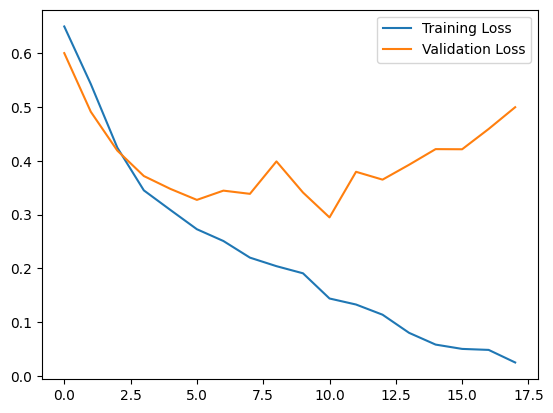

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step
CNN layer F1 Score: 0.9234828496042217
CNN layer Confusion Matrix:
 [[ 74  11]
 [ 18 175]]
              precision    recall  f1-score   support

   no crater       0.80      0.87      0.84        85
      crater       0.94      0.91      0.92       193

    accuracy                           0.90       278
   macro avg       0.87      0.89      0.88       278
weighted avg       0.90      0.90      0.90       278



In [7]:
from tensorflow.keras.callbacks import EarlyStopping

# Initialize CNN model with one more layer
model_CNN_l = Sequential()
model_CNN_l.add(Conv2D(2*32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model_CNN_l.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN_l.add(Conv2D(2*64, kernel_size=(3, 3), activation='relu'))
model_CNN_l.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN_l.add(Conv2D(2*64, kernel_size=(3, 3), activation='relu'))
model_CNN_l.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN_l.add(Flatten())
model_CNN_l.add(Dense(2*64, activation='relu'))
model_CNN_l.add(Dense(2, activation='softmax'))
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',  # Can also use 'val_accuracy'
                               patience=7,         # Number of epochs with no improvement after which training stops
                               mode='min',          # 'min' because we want to minimize the validation loss
                               restore_best_weights=True)  # Restore model weights from the epoch with the best loss

# Compile the model (use binary_crossentropy for binary classification)
model_CNN_l.compile(optimizer=adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history_cnn_l = model_CNN_l.fit(X_train_train, y_train_train_cat,
                            epochs=40,
                            batch_size=50,
                            validation_data=(X_val, y_val_cat),
                            callbacks=[early_stopping])  # Add the early stopping callback

# Plot the training and validation loss extra layer
plt.plot(history_cnn_l.history['loss'], label='Training Loss')
plt.plot(history_cnn_l.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Predict on validation data and evaluate
y_pred_cnn_l = np.argmax(model_CNN_l.predict(X_train_test), axis=1)

# Evaluate
f1_cnn_l = f1_score(Y_train_test, y_pred_cnn_l) # Add macro
conf_matrix_cnn_l = confusion_matrix(Y_train_test, y_pred_cnn_l)

print(f'CNN layer F1 Score: {f1_cnn_l}')
print(f'CNN layer Confusion Matrix:\n {conf_matrix_cnn_l}')


print(classification_report(Y_train_test,y_pred_cnn_l,target_names= ['no crater','crater'] ))

**Doubling nodes improves performance, adding an extra layer doesn't seem to improve it further.**

## CNN trying to balance the train dataset

Use of the extra dataset

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
360
1.1216462e-19
0.9999999
904


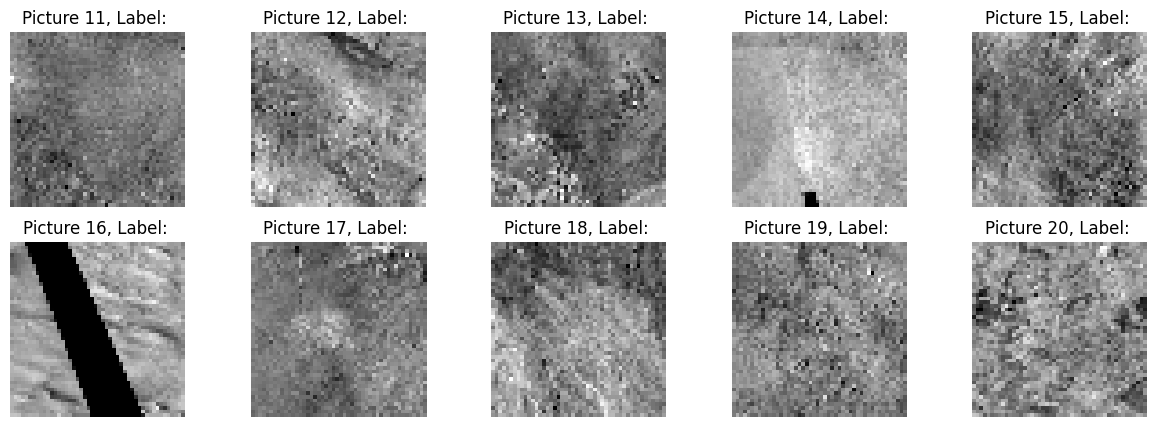

In [ ]:
# Pick out pictures with no crater with high certainty from the extra dataset

y_pred_extra = model_CNN_l.predict(X_train1_extra)

Y_extra_no_crater = []
X_extra_no_crater = []

for i in range(len(y_pred_extra)):

  if y_pred_extra[i][0] > 0.995:

    Y_extra_no_crater.append(y_pred_extra[i])
    X_extra_no_crater.append(X_train1_extra[i])

X_extra_no_crater = np.array(X_extra_no_crater)
Y_extra_no_crater = np.argmax(Y_extra_no_crater, axis = 1)

print(len(X_extra_no_crater))

print(np.min([row[0] for row in y_pred_extra]))
print(np.max([row[0] for row in y_pred_extra]))
print(len(y_pred_extra))

# Plot the first pictures from the extra data
plt.figure(figsize=(15, 5))
for i in range(10,20):
    plt.subplot(2, 5, i - 9)
    plt.imshow(X_extra_no_crater[i], cmap='gray')
    plt.title(f"Picture {i + 1}, Label: ")
    plt.axis('off')

plt.show()

### Train model with extra non crater pictures

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.6091 - loss: 0.6675 - val_accuracy: 0.6882 - val_loss: 0.6099
Epoch 2/40
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7759 - loss: 0.5236 - val_accuracy: 0.7419 - val_loss: 0.4990
Epoch 3/40
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8206 - loss: 0.4256 - val_accuracy: 0.7527 - val_loss: 0.4743
Epoch 4/40
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8410 - loss: 0.3812 - val_accuracy: 0.8244 - val_loss: 0.4609
Epoch 5/40
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8633 - loss: 0.3323 - val_accuracy: 0.8029 - val_loss: 0.4338
Epoch 6/40
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8684 - loss: 0.3168 - val_accuracy: 0.8244 - val_loss: 0.4144
Epoch 7/40
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9006 - loss: 0.2582 - val_accuracy: 0.8136 - val_loss: 0.4151
Epoch 8/40
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9012 - loss: 0.2571 - val_accuracy: 0.8029 - val_loss: 0.4196
E

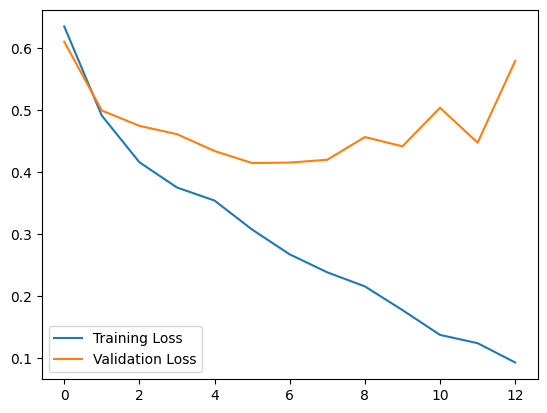

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
CNN extended F1 Score: 0.9076517150395779
CNN extended Confusion Matrix:
 [[ 71  14]
 [ 21 172]]
              precision    recall  f1-score   support

   no crater       0.77      0.84      0.80        85
      crater       0.92      0.89      0.91       193

    accuracy                           0.87       278
   macro avg       0.85      0.86      0.85       278
weighted avg       0.88      0.87      0.88       278



In [ ]:

X_train_extended = np.concatenate((X_train_train,X_extra_no_crater))
Y_train_extended = np.concatenate((Y_train_train,Y_extra_no_crater))

y_extended_cat = to_categorical(Y_train_extended, 2)

# Initialize CNN model with double nodes
model_CNN_e = Sequential()
model_CNN_e.add(Conv2D(2*32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model_CNN_e.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN_e.add(Conv2D(2*64, kernel_size=(3, 3), activation='relu'))
model_CNN_e.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN_e.add(Flatten())
model_CNN_e.add(Dense(2*64, activation='relu'))
model_CNN_e.add(Dense(2, activation='softmax'))
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',  # Can also use 'val_accuracy'
                               patience=7,         # Number of epochs with no improvement after which training stops
                               mode='min',          # 'min' because we want to minimize the validation loss
                               restore_best_weights=True)  # Restore model weights from the epoch with the best loss

# Compile the model (use binary_crossentropy for binary classification)
model_CNN_e.compile(optimizer=adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history_cnn_e = model_CNN_e.fit(X_train_extended, y_extended_cat,
                            epochs=40,
                            batch_size=50,
                            validation_data=(X_val, y_val_cat),
                            callbacks=[early_stopping])  # Add the early stopping callback

# Plot the training and validation loss extended
plt.plot(history_cnn_e.history['loss'], label='Training Loss')
plt.plot(history_cnn_e.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Predict on validation data and evaluate
y_pred_cnn_e = np.argmax(model_CNN_e.predict(X_train_test), axis=1)

# Evaluate
f1_cnn_e = f1_score(Y_train_test, y_pred_cnn_e) # Add macro
conf_matrix_cnn_e = confusion_matrix(Y_train_test, y_pred_cnn_e)

print(f'CNN extended F1 Score: {f1_cnn_e}')
print(f'CNN extended Confusion Matrix:\n {conf_matrix_cnn_e}')


print(classification_report(Y_train_test,y_pred_cnn_e,target_names= ['no crater','crater'] ))

### Train model with random oversampling

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.5230 - loss: 0.6871 - val_accuracy: 0.7527 - val_loss: 0.5385
Epoch 2/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7535 - loss: 0.5161 - val_accuracy: 0.7384 - val_loss: 0.4773
Epoch 3/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8133 - loss: 0.4198 - val_accuracy: 0.7706 - val_loss: 0.4529
Epoch 4/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8441 - loss: 0.3738 - val_accuracy: 0.8172 - val_loss: 0.4582
Epoch 5/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8509 - loss: 0.3366 - val_accuracy: 0.8065 - val_loss: 0.4577
Epoch 6/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8738 - loss: 0.3003 - val_accuracy: 0.7778 - val_loss: 0.4987
Epoch 7/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9027 - loss: 0.2476 - val_accuracy: 0.8315 - val_loss: 0.5643
Epoch 8/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9061 - loss: 0.2331 - val_accuracy: 0.7706 - val_loss: 0.5405
Ep

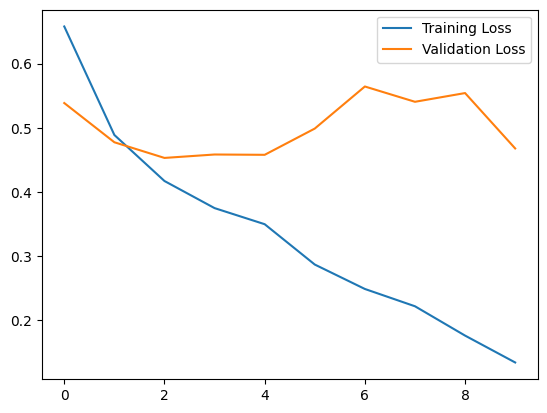

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
CNN extended F1 Score: 0.8255813953488372
CNN extended Confusion Matrix:
 [[ 76   9]
 [ 51 142]]
              precision    recall  f1-score   support

   no crater       0.60      0.89      0.72        85
      crater       0.94      0.74      0.83       193

    accuracy                           0.78       278
   macro avg       0.77      0.81      0.77       278
weighted avg       0.84      0.78      0.79       278



In [ ]:


from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Reshape the data into 2D format (samples, features) for oversampling
X_train_reshaped = X_train_train.reshape(X_train_train.shape[0], -1)

# Step 2: Use RandomOverSampler to balance the classes
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_reshaped, Y_train_train)

# Step 3: Reshape the oversampled data back into 48x48 images
X_train_resampled = X_train_resampled.reshape(X_train_resampled.shape[0], 48, 48, 1)

# Convert resampled labels to categorical (one-hot encoding)
y_train_resampled_cat = to_categorical(y_train_resampled, 2)

# Initialize CNN model with double nodes
model_CNN_o = Sequential()
model_CNN_o.add(Conv2D(2*32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model_CNN_o.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN_o.add(Conv2D(2*64, kernel_size=(3, 3), activation='relu'))
model_CNN_o.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN_o.add(Flatten())
model_CNN_o.add(Dense(2*64, activation='relu'))
model_CNN_o.add(Dense(2, activation='softmax'))
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',  # Can also use 'val_accuracy'
                               patience=7,         # Number of epochs with no improvement after which training stops
                               mode='min',          # 'min' because we want to minimize the validation loss
                               restore_best_weights=True)  # Restore model weights from the epoch with the best loss

# Compile the model (use binary_crossentropy for binary classification)
model_CNN_o.compile(optimizer=adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history_cnn_o = model_CNN_o.fit(X_train_resampled, y_train_resampled_cat,
                            epochs=40,
                            batch_size=50,
                            validation_data=(X_val, y_val_cat),
                            callbacks=[early_stopping])  # Add the early stopping callback

# Plot the training and validation loss oversampling
plt.plot(history_cnn_o.history['loss'], label='Training Loss')
plt.plot(history_cnn_o.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Predict on validation data and evaluate
y_pred_cnn_o = np.argmax(model_CNN_o.predict(X_train_test), axis=1)

# Evaluate
f1_cnn_o = f1_score(Y_train_test, y_pred_cnn_o) # Add macro
conf_matrix_cnn_o = confusion_matrix(Y_train_test, y_pred_cnn_o)

print(f'CNN extended F1 Score: {f1_cnn_o}')
print(f'CNN extended Confusion Matrix:\n {conf_matrix_cnn_o}')


print(classification_report(Y_train_test,y_pred_cnn_o,target_names= ['no crater','crater'] ))

### Train model with SMOTE


Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5454 - loss: 0.6836 - val_accuracy: 0.7348 - val_loss: 0.5749
Epoch 2/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7804 - loss: 0.5080 - val_accuracy: 0.7240 - val_loss: 0.5400
Epoch 3/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8223 - loss: 0.4428 - val_accuracy: 0.7455 - val_loss: 0.4986
Epoch 4/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8284 - loss: 0.4148 - val_accuracy: 0.8065 - val_loss: 0.4997
Epoch 5/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8535 - loss: 0.3551 - val_accuracy: 0.7957 - val_loss: 0.5103
Epoch 6/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8417 - loss: 0.3747 - val_accuracy: 0.7384 - val_loss: 0.5118
Epoch 7/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8504 - loss: 0.3582 - val_accuracy: 0.8244 - val_loss: 0.5758
Epoch 8/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8588 - loss: 0.3442 - val_accuracy: 0.8029 - val_loss: 0.5343
Ep

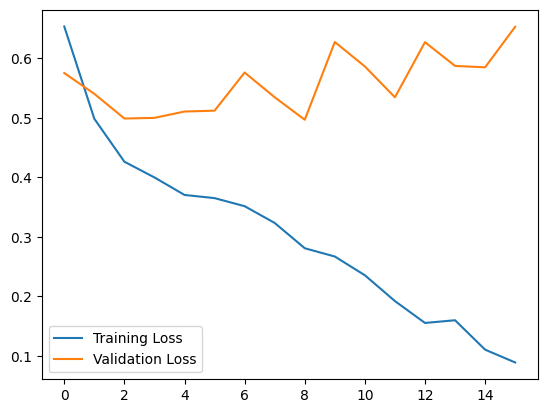

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
CNN smote F1 Score: 0.8674033149171271
CNN smote Confusion Matrix:
 [[ 73  12]
 [ 36 157]]
              precision    recall  f1-score   support

   no crater       0.67      0.86      0.75        85
      crater       0.93      0.81      0.87       193

    accuracy                           0.83       278
   macro avg       0.80      0.84      0.81       278
weighted avg       0.85      0.83      0.83       278



In [ ]:

# Step 1: Reshape the data into 2D format (samples, features) for oversampling
X_train_reshaped = X_train_train.reshape(X_train_train.shape[0], -1)

# Step 2: Use SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_reshaped, Y_train_train)

# Step 3: Reshape the oversampled data back into 48x48 images
X_train_smote = X_train_smote.reshape(X_train_resampled.shape[0], 48, 48, 1)

# Convert resampled labels to categorical (one-hot encoding)
y_train_smote_cat = to_categorical(y_train_smote, 2)

# Initialize CNN model with double nodes
model_CNN_smote = Sequential()
model_CNN_smote.add(Conv2D(2*32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model_CNN_smote.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN_smote.add(Conv2D(2*64, kernel_size=(3, 3), activation='relu'))
model_CNN_smote.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN_smote.add(Flatten())
model_CNN_smote.add(Dense(2*64, activation='relu'))
model_CNN_smote.add(Dense(2, activation='softmax'))
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',  # Can also use 'val_accuracy'
                               patience=7,         # Number of epochs with no improvement after which training stops
                               mode='min',          # 'min' because we want to minimize the validation loss
                               restore_best_weights=True)  # Restore model weights from the epoch with the best loss

# Compile the model (use binary_crossentropy for binary classification)
model_CNN_smote.compile(optimizer=adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history_cnn_smote = model_CNN_smote.fit(X_train_smote, y_train_smote_cat,
                            epochs=40,
                            batch_size=50,
                            validation_data=(X_val, y_val_cat),
                            callbacks=[early_stopping])  # Add the early stopping callback

# Plot the training and validation loss extended
plt.plot(history_cnn_smote.history['loss'], label='Training Loss')
plt.plot(history_cnn_smote.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Predict on validation data and evaluate
y_pred_cnn_smote = np.argmax(model_CNN_smote.predict(X_train_test), axis=1)

# Evaluate
f1_cnn_smote = f1_score(Y_train_test, y_pred_cnn_smote) # Add macro
conf_matrix_cnn_smote = confusion_matrix(Y_train_test, y_pred_cnn_smote)

print(f'CNN smote F1 Score: {f1_cnn_smote}')
print(f'CNN smote Confusion Matrix:\n {conf_matrix_cnn_smote}')


print(classification_report(Y_train_test,y_pred_cnn_smote,target_names= ['no crater','crater'] ))

### CNN with different class weight

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.5521 - loss: 0.6968 - val_accuracy: 0.6344 - val_loss: 0.6360
Epoch 2/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7091 - loss: 0.6492 - val_accuracy: 0.6595 - val_loss: 0.5799
Epoch 3/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7588 - loss: 0.4960 - val_accuracy: 0.7670 - val_loss: 0.4618
Epoch 4/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8169 - loss: 0.4173 - val_accuracy: 0.7957 - val_loss: 0.4176
Epoch 5/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8424 - loss: 0.3679 - val_accuracy: 0.7814 - val_loss: 0.4465
Epoch 6/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8337 - loss: 0.3727 - val_accuracy: 0.7778 - val_loss: 0.4638
Epoch 7/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8606 - loss: 0.3232 - val_accuracy: 0.7419 - val_loss: 0.5596
Epoch 8/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8653 - loss: 0.3078 - val_accuracy: 0.8746 - val_loss: 0.3328
E

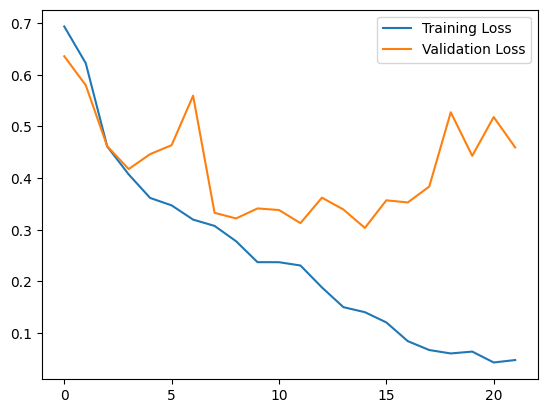

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
CNN F1 Score: 0.912
CNN Confusion Matrix:
 [[ 74  11]
 [ 22 171]]
              precision    recall  f1-score   support

   no crater       0.77      0.87      0.82        85
      crater       0.94      0.89      0.91       193

    accuracy                           0.88       278
   macro avg       0.86      0.88      0.86       278
weighted avg       0.89      0.88      0.88       278



In [ ]:

# Initialize CNN model with one more layer
model_CNN_w = Sequential()
model_CNN_w.add(Conv2D(2*32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model_CNN_w.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN_w.add(Conv2D(2*64, kernel_size=(3, 3), activation='relu'))
model_CNN_w.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN_w.add(Conv2D(2*64, kernel_size=(3, 3), activation='relu'))
model_CNN_w.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN_w.add(Flatten())
model_CNN_w.add(Dense(2*64, activation='relu'))
model_CNN_w.add(Dense(2, activation='softmax'))
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',  # Can also use 'val_accuracy'
                               patience=7,         # Number of epochs with no improvement after which training stops
                               mode='min',          # 'min' because we want to minimize the validation loss
                               restore_best_weights=True)  # Restore model weights from the epoch with the best loss

# Compile the model (use binary_crossentropy for binary classification)
model_CNN_w.compile(optimizer=adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Calculate class weights
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(Y_train_train), y=Y_train_train)
class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}

# Train the model with early stopping
history_cnn_w = model_CNN_w.fit(X_train_train, y_train_train_cat,
                            epochs=40,
                            batch_size=50,
                            validation_data=(X_val, y_val_cat),
                            class_weight=class_weights_dict,
                            callbacks=[early_stopping])  # Add the early stopping callback
# Plot the training and validation loss
plt.plot(history_cnn_w.history['loss'], label='Training Loss')
plt.plot(history_cnn_w.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Predict on validation data and evaluate
y_pred_cnn_w = np.argmax(model_CNN_w.predict(X_train_test), axis=1)

# Evaluate
f1_cnn_w = f1_score(Y_train_test, y_pred_cnn_w) # Add macro
conf_matrix_cnn_w = confusion_matrix(Y_train_test, y_pred_cnn_w)

print(f'CNN F1 Score: {f1_cnn_w}')
print(f'CNN Confusion Matrix:\n {conf_matrix_cnn_w}')


print(classification_report(Y_train_test,y_pred_cnn_w,target_names= ['no crater','crater'] ))

### Data Agumentation

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.4771 - loss: 0.9812 - val_accuracy: 0.6774 - val_loss: 0.9981
Epoch 2/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.4985 - loss: 0.6890 - val_accuracy: 0.6882 - val_loss: 0.9617
Epoch 3/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.3811 - loss: 0.6936 - val_accuracy: 0.6774 - val_loss: 0.9863
Epoch 4/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6050 - loss: 0.6932 - val_accuracy: 0.6810 - val_loss: 0.9590
Epoch 5/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.3886 - loss: 0.6976 - val_accuracy: 0.6774 - val_loss: 0.9697
Epoch 6/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.4256 - loss: 0.7034 - val_accuracy: 0.6774 - val_loss: 0.9648
Epoch 7/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.5955 - loss: 0.6920 - val_accuracy: 0.6810 - val_loss: 0.9563


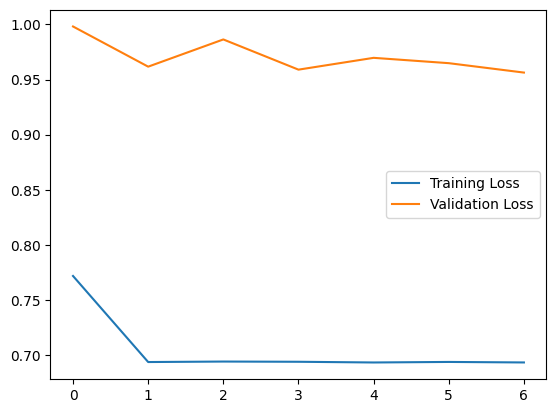

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
CNN F1 Score: 0.8464912280701754
CNN Confusion Matrix:
 [[ 15  70]
 [  0 193]]
              precision    recall  f1-score   support

   no crater       1.00      0.18      0.30        85
      crater       0.73      1.00      0.85       193

    accuracy                           0.75       278
   macro avg       0.87      0.59      0.57       278
weighted avg       0.82      0.75      0.68       278



In [ ]:
'''
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Initialize the ImageDataGenerator for data augmentation
# Here we reduce the brightness of the images to worsen contrast (worsening contrast can be achieved by modifying brightness)
datagen = ImageDataGenerator(
    brightness_range=[0.2, 0.5],  # Worsen contrast by reducing brightness
    horizontal_flip=True,         # Randomly flip images to add variation
    rotation_range=20,            # Rotate images up to 20 degrees
    width_shift_range=0.2,        # Randomly shift the image horizontally
    height_shift_range=0.2        # Randomly shift the image vertically
)

# Fit the data generator on the training dataset (optional, depending on the augmentation)
datagen.fit(X_train_train)

# Use the generator to create batches of augmented data on-the-fly during model training
# Adjust the model training to use the data generator
history_cnn_l = model_CNN_l.fit(
    datagen.flow(X_train_train, y_train_train_cat, batch_size=50),  # Augmented data
    epochs=40,
    validation_data=(X_val, y_val_cat),
    class_weight=class_weights_dict,  # Use the class weights to handle imbalance
    callbacks=[early_stopping]        # Early stopping to prevent overfitting
)


# Plot the training and validation loss for the new model
plt.plot(history_cnn_l.history['loss'], label='Training Loss')
plt.plot(history_cnn_l.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Predict on the validation data and evaluate
y_pred_cnn = np.argmax(model_CNN_l.predict(X_train_test), axis=1)

# Calculate F1 score and confusion matrix
f1_cnn = f1_score(Y_train_test, y_pred_cnn)
conf_matrix_cnn = confusion_matrix(Y_train_test, y_pred_cnn)

print(f'CNN F1 Score: {f1_cnn}')
print(f'CNN Confusion Matrix:\n {conf_matrix_cnn}')

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(Y_train_test, y_pred_cnn, target_names=['no crater', 'crater']))
'''

# KNN model

In [ ]:

# Initialize KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train_train_flat, Y_train_train)

# Make predictions
y_pred_knn = knn.predict(X_train_test_flat)

# Evaluate
f1_knn = f1_score(Y_train_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(Y_train_test, y_pred_knn)

print(f'KNN F1 Score: {f1_knn}')
print(f'KNN Confusion Matrix:\n {conf_matrix_knn}')



# SVC model

## Linear Kernel

In [ ]:
from sklearn.svm import SVC

# Initialize SVM
# Try rbf kernel
svm_model = SVC(kernel='linear', class_weight='balanced')

# Fit the model
svm_model.fit(X_train_train_flat, Y_train_train)

# Make predictions
y_pred_svm = svm_model.predict(X_train_test_flat)

# Evaluate
f1_svm = f1_score(Y_train_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(Y_train_test, y_pred_svm)

print(f'SVM F1 Score: {f1_svm}')
print(f'SVM Confusion Matrix:\n {conf_matrix_svm}')

SVM F1 Score: 0.6609686609686609
SVM Confusion Matrix:
 [[ 43  42]
 [ 77 116]]


## RBF Kernel

In [ ]:
svm_model_rbf = SVC(kernel='rbf', class_weight='balanced')

svm_model_rbf.fit(X_train_train_flat, Y_train_train)

y_pred_svm_rbf = svm_model_rbf.predict(X_train_test_flat)

f1_svm = f1_score(Y_train_test, y_pred_svm_rbf)
conf_matrix_svm = confusion_matrix(Y_train_test, y_pred_svm_rbf)

print(f'SVM F1 Score (RBF): {f1_svm}')
print(f'SVM Confusion Matrix (RBF):\n {conf_matrix_svm}')

SVM F1 Score (RBF): 0.8136482939632546
SVM Confusion Matrix (RBF):
 [[ 52  33]
 [ 38 155]]


**RBF function performs lots better than Linear one, but generally the CNN model is better**

# Y_test Prediction with the best CNN model

Out best model is the CNN with 3 convolutional layers

In [8]:
# Predict the y_test

y_test = model_CNN_l.predict(X_test1)

y_test = np.argmax(y_test, axis = 1)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


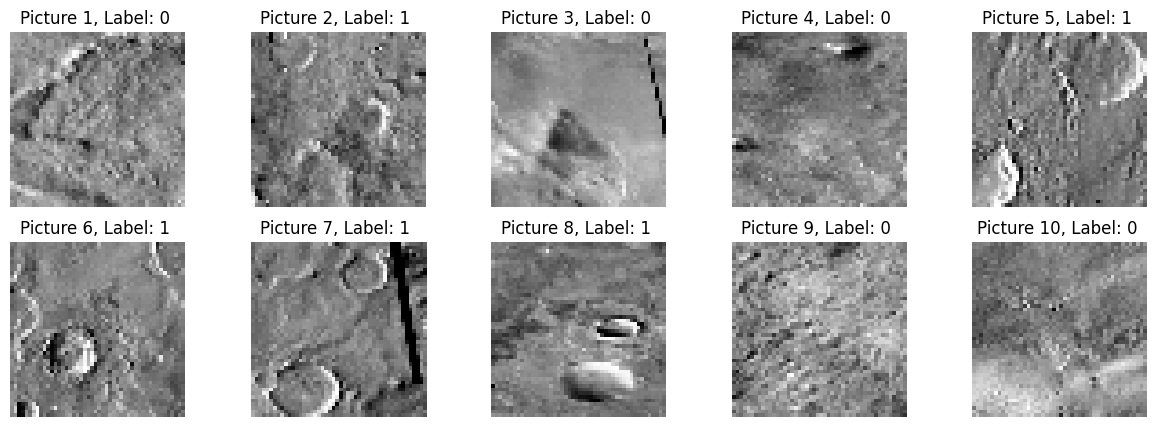

In [12]:
# Plot the first pictures from the extra data
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i +1)
    plt.imshow(X_test1[i], cmap='gray')
    plt.title(f"Picture {i + 1}, Label: {y_test[i]} ")
    plt.axis('off')

plt.show()

# Deliver Ouput

In [ ]:
np.save('Y_test.npy', y_test)

In [3]:
# prompt: Write some code that counts the number of ones and zeroes in the Y_train1 vector

import numpy as np

# Assuming Y_train1 is defined in your previous code
# Replace this with the actual variable name if different
# For example:  Y_train1 = ...

# Count the number of ones and zeros
num_ones = np.sum(Y_train_train == 1)  # Corrected: Use Y_train_train instead of Y_train1
num_zeros = np.sum(Y_train_train == 0) # Corrected: Use Y_train_train instead of Y_train1

print(f"Number of ones: {num_ones}")
print(f"Number of zeros: {num_zeros}")

Number of ones: 1407
Number of zeros: 819
